In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


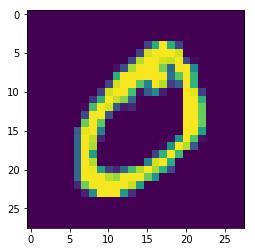

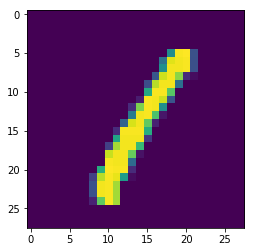

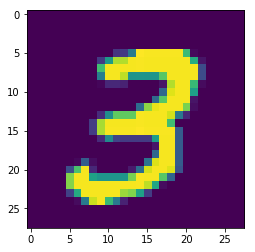

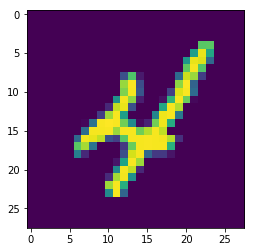

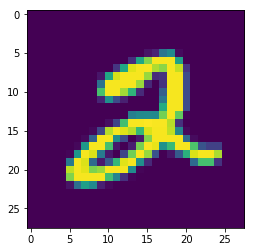

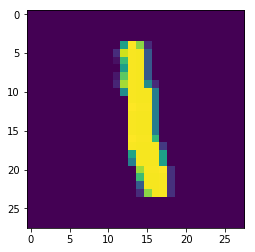

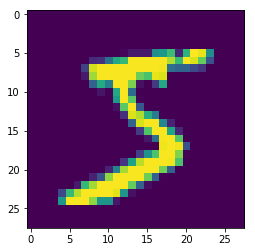

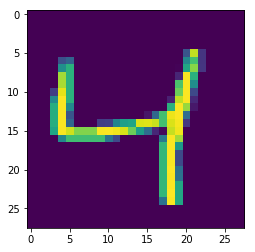

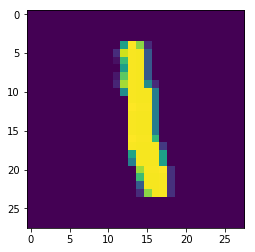

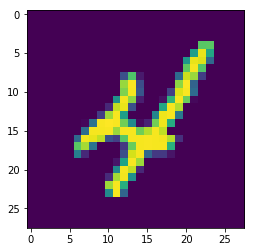

In [30]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(10):
    rand_idx = np.random.randint(10)
    plt.figure()
    plt.imshow(x_train[rand_idx].reshape(28,28))
    plt.show()

In [2]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

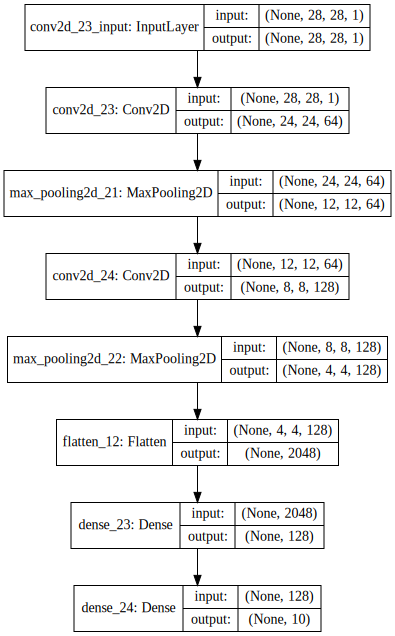

In [17]:
# Visualize the model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [3]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s - loss: 0.2317 - acc: 0.9301 - val_loss: 0.0674 - val_acc: 0.9797
Epoch 2/15
60000/60000 [==============================] - 3s - loss: 0.0566 - acc: 0.9824 - val_loss: 0.0590 - val_acc: 0.9802
Epoch 3/15
60000/60000 [==============================] - 3s - loss: 0.0388 - acc: 0.9880 - val_loss: 0.0318 - val_acc: 0.9894
Epoch 4/15
60000/60000 [==============================] - 3s - loss: 0.0300 - acc: 0.9909 - val_loss: 0.0275 - val_acc: 0.9908
Epoch 5/15
60000/60000 [==============================] - 3s - loss: 0.0233 - acc: 0.9929 - val_loss: 0.0264 - val_acc: 0.9909
Epoch 6/15
60000/60000 [==============================] - 3s - loss: 0.0185 - acc: 0.9947 - val_loss: 0.0251 - val_acc: 0.9913
Epoch 7/15
60000/60000 [==============================] - 3s - loss: 0.0152 - acc: 0.9953 - val_loss: 0.0244 - val_acc: 0.9919
Epoch 8/15
60000/60000 [==============================] - 3s 